In [1]:
import pandas as pd


df = pd.read_csv("pca_dat.csv")
df = df.drop("Unnamed: 0", axis=1)

# first go back from normalization
mood_mean = 6.994508952080043
mood_std = 0.719659211765692

# Recalculate the moods back using the mean and STD
df["mood"] = (df["mood"]*mood_std)+mood_mean
df["mood"] = df["mood"].round()

df = df.reset_index()

X = df.drop('mood', axis=1)
y = df['mood']
X

,index,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0.699716,0.246129,0.116635,-0.273108,-0.062836,0.040740,0.079696,0.002588,-0.043754,0.073418,-0.266104,0.087415
1,1,0.400494,0.135455,0.137094,-0.179559,0.033187,0.118881,0.067689,0.009766,-0.055018,0.026952,-0.124208,0.070269
2,2,0.309390,0.055626,0.096834,-0.149769,0.003255,0.131676,0.035541,-0.002411,-0.063246,0.015687,-0.078657,0.049075
3,3,0.362123,0.172488,0.064722,-0.195087,0.076621,0.157589,0.061462,0.044569,-0.062924,0.063388,-0.097793,0.050759
4,4,0.412171,0.071362,0.044727,-0.204008,0.015729,0.201462,0.090661,0.010865,-0.064298,0.055714,-0.069057,0.055631
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1297,0.106461,0.255451,-0.101369,-0.003025,-0.066937,-0.052508,0.041390,-0.072941,0.066249,0.070556,0.021867,0.015090
1298,1298,0.205367,-0.019991,-0.025526,0.027734,-0.247806,-0.045668,0.115463,-0.057711,0.075130,0.078043,0.032218,-0.004510
1299,1299,0.142888,0.103533,0.017775,0.078470,-0.115158,-0.049788,0.014795,0.001918,0.099241,0.087850,0.027452,0.005857
1300,1300,0.172702,0.157772,0.036606,0.075103,-0.105930,-0.060349,0.037713,-0.012755,0.085252,0.084990,-0.039318,-0.005066


## Recurrent Neural Network

For this first classification we will train a neural network in order to predict the mood for the next day.

In order to do classification, we need a training set and a testing set. We will use 80% of the data for training purposes and 20% for testing purposes.


In [2]:
from keras import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical

X_reshaped = X.values.reshape(-1, 1, X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val1 = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# to categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val1)

2023-04-19 01:57:16.246354: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(64, input_shape=(1, X.shape[1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_val.shape[1], activation='sigmoid'))

model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=['accuracy', 'mae', 'mse'])

2023-04-19 01:57:19.357291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 01:57:19.360640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 01:57:19.363176: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [4]:
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/150


2023-04-19 01:57:19.919809: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 01:57:19.922199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 01:57:19.924002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

15/25 [=================>............] - ETA: 0s - loss: 2.2209 - accuracy: 0.0750 - mae: 0.5022 - mse: 0.2532      

2023-04-19 01:57:22.853079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 01:57:22.855896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 01:57:22.857960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25/25 [==============================] - 4s 34ms/step - loss: 2.1479 - accuracy: 0.3000 - mae: 0.4988 - mse: 0.2501 - val_loss: 1.9741 - val_accuracy: 0.6092 - val_mae: 0.4871 - val_mse: 0.2397
Epoch 2/150
25/25 [==============================] - 0s 5ms/step - loss: 1.7517 - accuracy: 0.6474 - mae: 0.4580 - mse: 0.2156 - val_loss: 1.4194 - val_accuracy: 0.6092 - val_mae: 0.4112 - val_mse: 0.1831
Epoch 3/150
25/25 [==============================] - 0s 6ms/step - loss: 1.1048 - accuracy: 0.6474 - mae: 0.3635 - mse: 0.1602 - val_loss: 0.8111 - val_accuracy: 0.6092 - val_mae: 0.3013 - val_mse: 0.1436
Epoch 4/150
25/25 [==============================] - 0s 5ms/step - loss: 0.7280 - accuracy: 0.6474 - mae: 0.2602 - mse: 0.1308 - val_loss: 0.7048 - val_accuracy: 0.6092 - val_mae: 0.2254 - val_mse: 0.1217
Epoch 5/150
25/25 [==============================] - 0s 5ms/step - loss: 0.6756 - accuracy: 0.6474 - mae: 0.2095 - mse: 0.1180 - val_loss: 0.6852 - val_accuracy: 0.6092 - val_mae: 0.1978 - va

Epoch 41/150
25/25 [==============================] - 0s 5ms/step - loss: 0.5880 - accuracy: 0.6974 - mae: 0.1176 - mse: 0.1102 - val_loss: 0.5828 - val_accuracy: 0.6705 - val_mae: 0.1174 - val_mse: 0.1106
Epoch 42/150
25/25 [==============================] - 0s 6ms/step - loss: 0.5759 - accuracy: 0.6846 - mae: 0.1170 - mse: 0.1102 - val_loss: 0.5734 - val_accuracy: 0.6667 - val_mae: 0.1174 - val_mse: 0.1106
Epoch 43/150
25/25 [==============================] - 0s 6ms/step - loss: 0.5752 - accuracy: 0.6910 - mae: 0.1174 - mse: 0.1102 - val_loss: 0.6174 - val_accuracy: 0.6667 - val_mae: 0.1179 - val_mse: 0.1106
Epoch 44/150
25/25 [==============================] - 0s 5ms/step - loss: 0.5772 - accuracy: 0.6897 - mae: 0.1179 - mse: 0.1101 - val_loss: 0.6145 - val_accuracy: 0.6667 - val_mae: 0.1178 - val_mse: 0.1106
Epoch 45/150
25/25 [==============================] - 0s 5ms/step - loss: 0.5654 - accuracy: 0.6846 - mae: 0.1171 - mse: 0.1101 - val_loss: 0.5429 - val_accuracy: 0.6628 - val_

Epoch 81/150
25/25 [==============================] - 0s 5ms/step - loss: 0.3328 - accuracy: 0.8500 - mae: 0.1124 - mse: 0.1084 - val_loss: 0.2416 - val_accuracy: 0.9272 - val_mae: 0.1129 - val_mse: 0.1092
Epoch 82/150
25/25 [==============================] - 0s 5ms/step - loss: 0.2722 - accuracy: 0.9051 - mae: 0.1123 - mse: 0.1085 - val_loss: 0.2633 - val_accuracy: 0.8736 - val_mae: 0.1124 - val_mse: 0.1085
Epoch 83/150
25/25 [==============================] - 0s 5ms/step - loss: 0.2417 - accuracy: 0.9128 - mae: 0.1121 - mse: 0.1078 - val_loss: 0.2475 - val_accuracy: 0.8851 - val_mae: 0.1122 - val_mse: 0.1078
Epoch 84/150
25/25 [==============================] - 0s 5ms/step - loss: 0.2935 - accuracy: 0.8718 - mae: 0.1120 - mse: 0.1073 - val_loss: 0.2380 - val_accuracy: 0.9157 - val_mae: 0.1123 - val_mse: 0.1077
Epoch 85/150
25/25 [==============================] - 0s 5ms/step - loss: 0.2515 - accuracy: 0.9051 - mae: 0.1117 - mse: 0.1069 - val_loss: 0.2717 - val_accuracy: 0.8774 - val_

Epoch 121/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1907 - accuracy: 0.9231 - mae: 0.1051 - mse: 0.0983 - val_loss: 0.3276 - val_accuracy: 0.8544 - val_mae: 0.1035 - val_mse: 0.0954
Epoch 122/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1843 - accuracy: 0.9282 - mae: 0.1045 - mse: 0.0974 - val_loss: 0.1551 - val_accuracy: 0.9349 - val_mae: 0.1054 - val_mse: 0.0986
Epoch 123/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1669 - accuracy: 0.9256 - mae: 0.1048 - mse: 0.0980 - val_loss: 0.1645 - val_accuracy: 0.9195 - val_mae: 0.1049 - val_mse: 0.0981
Epoch 124/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1408 - accuracy: 0.9551 - mae: 0.1044 - mse: 0.0977 - val_loss: 0.1466 - val_accuracy: 0.9387 - val_mae: 0.1051 - val_mse: 0.0986
Epoch 125/150
25/25 [==============================] - 0s 5ms/step - loss: 0.1398 - accuracy: 0.9462 - mae: 0.1044 - mse: 0.0977 - val_loss: 0.2177 - val_accuracy: 0.8812 -

In [5]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 0.1376 - accuracy: 0.9464 - mae: 0.0996 - mse: 0.0910


[0.1376386135816574,
 0.946360170841217,
 0.09963611513376236,
 0.09101465344429016]

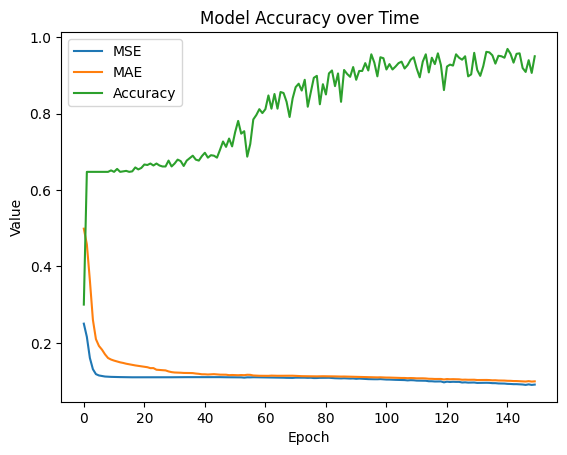

In [6]:
import matplotlib.pyplot as plt

# plot the training and validation accuracy over time
plt.figure()
plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy over Time')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(["MSE", "MAE", "Accuracy"], loc="upper left")
plt.show()

1/9 [==>...........................] - ETA: 3s

2023-04-19 01:57:45.419322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-19 01:57:45.421790: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-19 01:57:45.423705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

9/9 [==============================] - 0s 3ms/step


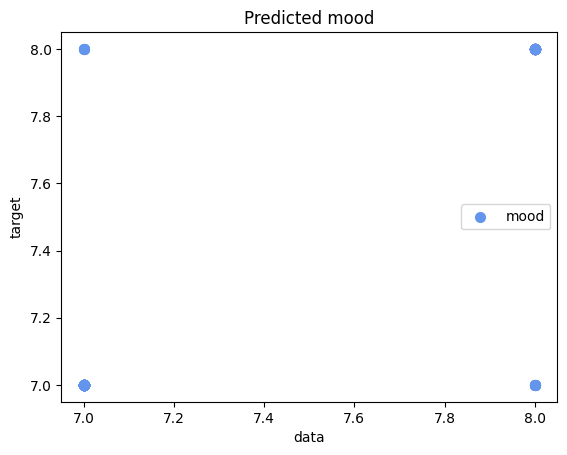

In [7]:
# Plot the predicted value against the value

y_pred = model.predict(X_val)
y_pred_class = np.argmax(y_pred, axis=1)

plt.figure()
plt.scatter(y_val1, y_pred_class, color="cornflowerblue", label="mood", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Predicted mood")
plt.legend()
plt.show()

# Random Forest Classifier

We will now create a random forest classifier that will help us predict the mood for the next day.

In [8]:
from sklearn.model_selection import train_test_split

mood_mean = 6.994508952080043
mood_std = 0.719659211765692

# Recalculate the moods back using the mean and STD
df["mood"] = (df["mood"]*mood_std)+mood_mean
df["mood"] = df["mood"].round()

# split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(y_train)

789     12.0
1295    12.0
264     12.0
1187    12.0
384     13.0
        ... 
461     13.0
982     12.0
173     12.0
325     12.0
751     13.0
Name: mood, Length: 832, dtype: float64


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Evaluate the classifier on the testing data
accuracy = rf.score(X_test, y_test)
print("Random Forest accuracy:", accuracy)


Random Forest accuracy: 0.9003831417624522
